## 1. Data Generation and Visualization

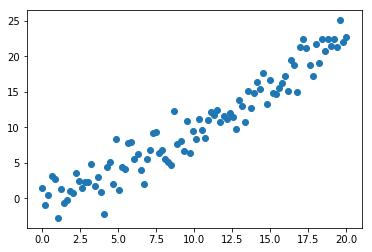

In [57]:
import numpy as np
import matplotlib.pyplot as plt

n_samples = 100
train_x = np.linspace(0, 20, n_samples)
np.random.seed(0)
noise = np.random.normal(0, 2, n_samples)
train_y = train_x * 1.2 - 2 + noise
plt.scatter(train_x, train_y)
plt.show()

### 2. Normal Equation
$\beta = (X^T X)^{-1}X^Ty$

In [58]:
X = np.transpose(np.vstack([train_x, np.ones(n_samples)]))
NE_solution = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X), X)), np.transpose(X)), train_y.reshape([-1, 1]))
print(NE_solution)

[[ 1.17026731]
 [-1.5830571 ]]


### 3. Sklearn

In [59]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()
linreg.fit(train_x.reshape([-1, 1]), train_y)
print(linreg.coef_)
print(linreg.intercept_)
y_pred = linreg.predict(train_x.reshape([-1, 1]))

[1.17026731]
-1.5830571043155839


### 4. Gradient Descent
$
\begin{aligned}
\frac{\partial}{\partial \theta_j} J(\theta) &= \frac{\partial}{\partial \theta_j} \frac{1}{2} (h_\theta(x) - y)^2\\
 &= 2 \cdot \frac{1}{2} (h_\theta(x) - y) \cdot \frac{\partial}{\partial \theta_j} (h_\theta(x) - y) \\
 &= (h_\theta(x) - y) \cdot \frac{\partial}{\partial \theta_j} (\sum_{i=0}^n \theta_i x_i - y) \\
 &= (h_\theta(x) - y) x_j
\end{aligned}
$

In [60]:
n_iterations = 8000
learning_rate = 0.01

# y = m * x + b
m = 0
b = 0

for i in range(n_iterations):
    y_pred = m * train_x + b
    mse_loss = np.square(train_y - y_pred).mean() / 2
    m_gradient = (train_x * (y_pred - train_y)).mean()
    b_gradient = (y_pred - train_y).mean()
    m = m - learning_rate * m_gradient
    b = b - learning_rate * b_gradient
print(m)
print(b)

1.1702673133318542
-1.5830571015522024


### 5. Visulization

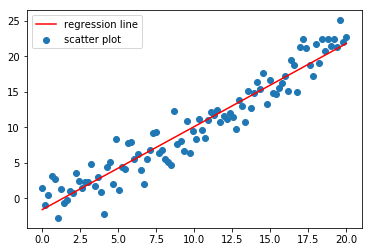

In [61]:
y_pred = m * train_x + b
plt.scatter(train_x, train_y, label='scatter plot')
plt.plot(train_x, y_pred, c='r', label='regression line')
plt.legend()
plt.show()

In [62]:
n_iterations = 50
learning_rate = 0.001

# y = m * x + b
m = 0
b = 0

y_pred_list = []
mse_loss_list = []
for i in range(n_iterations):
    y_pred = m * train_x + b
    y_pred_list.append(y_pred)
    mse_loss = np.square(train_y - y_pred).mean() / 2
    mse_loss_list.append(mse_loss)
    m_gradient = (train_x * (y_pred - train_y)).mean()
    b_gradient = (y_pred - train_y).mean()
    m = m - learning_rate * m_gradient
    b = b - learning_rate * b_gradient
mse_loss_array = np.array(mse_loss_list)
print(m)
print(b)

1.046869651225781
0.0573187875826816


In [63]:
%%capture
%matplotlib inline
import matplotlib.animation
plt.rcParams["animation.html"] = "jshtml"

iteration_array = np.arange(n_iterations)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
ax1.axis([0, n_iterations, 0, 80])
ax1.set_xlabel('Iteration')
ax1.set_ylabel('mse_loss')
ax2.scatter(train_x, train_y)
l2, = ax2.plot([], [], color='r')
l1, = ax1.plot([], [])

def animate(i):
    ax2.set_xlabel('iteration %d' % i)
    l2.set_data(train_x, y_pred_list[i])
    l1.set_data(iteration_array[:i], mse_loss_array[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(y_pred_list), interval=50)